# Taylor Expansion

[Chanseok Kang](https://kcsgoodboy.github.io) ([LG
Electronics](https://www.lge.co.kr/))  
2025-07-28

[![Open In
Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/kcsgoodboy/kcsgoodboy.github.io/blob/main/posts/2025-07-28_taylor_expansion/post.ipynb)

> **Note**
>
> 해당 내용은 Udemy에 올려져있는 Börge Göbel의 [“Computational Physics:
> Scientific Programming with
> Python”](https://www.udemy.com/course/computational-physics) 내용을
> 요약한 것입니다.

## Package Import

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

## Why Taylor Expansion?

테일러 전개(Taylor Expansion)을 사용하는 이유는 복잡한 함수를 간단한
다항식 형태로 근사(Approximation)하기 위해서다. 수학을 공부하다보면
다양한 수식들이 나오는데, 우리가 이론상에서 자주 접하는 식의 원본은 보통
삼각함수나 자연지수 함수로 이뤄져 있는게 많다. 이런 함수끼리의 연산은
실제로 계산하기에는 너무 복잡하고, 연산량도 크지만 Taylor Expansion을
사용하면 이런 복잡한 수식을 쉽게 표현할 수 있다.

예를 들어서, 어떤 함수의 도함수(derivative)를 계산할 수 있다면, 그
함수의 특정 값에 대한 근사치를 이 도함수를 활용해서 표현할 수 있다.

$$f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n$$

여기에서 $f^{(n)}$ 는 $f(x)$에 대한 $n$차 도함수이고, $x_0$ 는 우리가
계산하고자 하는 값의 위치를 나타낸다.

## 1.1 Exponential Function

만약 우리가 구하고자 하는 함수의 원형이 자연지수 함수 (exponential
function)이라면 쉽게 Taylor Expansion을 적용할 수 있다.

$$f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x)$$

자연지수의 도함수는 자연지수 자체이기 때문이다. 이에 대한 코드와
시각화결과는 아래와 같이 표현할 수 있다.

In [2]:
def ExpTaylor(x, x0, nmax):
    t = 0
    for n in range(nmax + 1):
        t = t + (np.exp(x0) * (x - x0) ** n) / scipy.special.factorial(n)
    return t

> **Note**
>
> 원래 예제에서는 factorial 계산시 `np.math.factorial`을 사용했지만,
> `math` sub package는 원래 `numpy`에서 제공하는게 아니였다. 그래서
> `math`가 없어진 형태로 버전업이 되면서, 위의 예시에선
> `scipy.special`을 통해서 계산하도록 변경했다. 결과는 우리가 생각하는
> 것과 동일하다.

In [3]:
np.exp(1), ExpTaylor(1, 0, 10)

(2.718281828459045, 2.7182818011463845)

그래서 실제의 자연함수의 값과 근사값을 비교해보면 제법 비슷하다는 것을
확인할 수 있다.

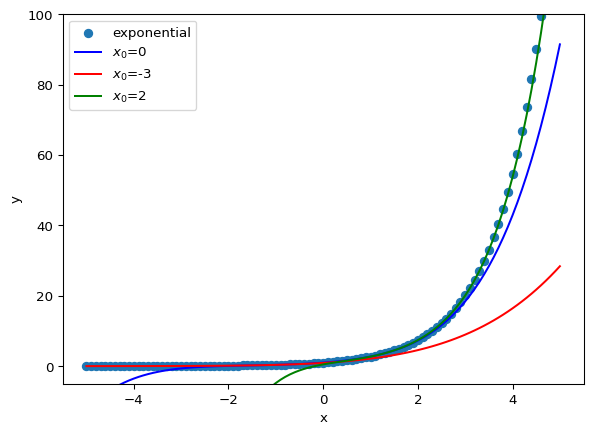

In [4]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-5, 100])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, np.exp(x_list), label='exponential')

nmax = 5
plt.plot(x_list, ExpTaylor(x_list, 0, nmax), c='blue', label='$x_0$=0')
plt.plot(x_list, ExpTaylor(x_list, -3, nmax), c='red', label='$x_0$=-3')
plt.plot(x_list, ExpTaylor(x_list, 2, nmax), c='green', label='$x_0$=2')
plt.legend()
plt.show()

사실 연산량을 줄이기 위한 근사의 영역이고, 해당 함수를 정확하게 표현하지
못하는 부분은 초기점을 바꾼 결과만 확인해도 알 수 있다. 하지만 적절한
초기점이 선택되면 원래 우리가 구하고자 하는 원래 함수와 근접하게 유사한
근사값을 구할 수 있다.

## 1.2 Sin function at $x_0=0$

삼각함수중 sin function의 taylor expansion은 아래와 같이 표현된다.

$f(0) = f''(0) = f^{(4)}(0) = \dots = 0$

$f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1$

$f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1$

$\sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}$

In [5]:
def SinTaylor(x, nmax):
    t = 0
    for n in range(nmax + 1):
        t = t + ((-1) ** n / scipy.special.factorial(2 * n + 1)) * (x ** (2 * n + 1))
    return t

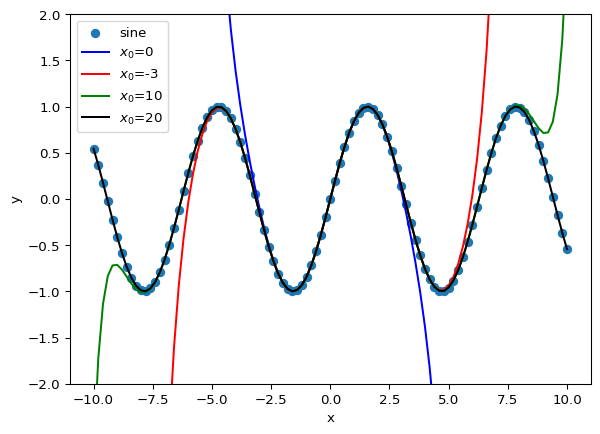

In [6]:
x_list = np.linspace(-10, 10, 101)
plt.ylim([-2, 2])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, np.sin(x_list), label='sine')

plt.plot(x_list, SinTaylor(x_list, 3), c='blue', label='$x_0$=0')
plt.plot(x_list, SinTaylor(x_list, 6), c='red', label='$x_0$=-3')
plt.plot(x_list, SinTaylor(x_list, 10), c='green', label='$x_0$=10')
plt.plot(x_list, SinTaylor(x_list, 20), c='black', label='$x_0$=20')
plt.legend()
plt.show()

In [7]:
np.sin(2.5), SinTaylor(2.5, 10)

(0.5984721441039565, 0.598472144104011)

## 1.3 Implementation of General Function

앞에서는 간단한 함수에 대한 도함수를 안다고 가정하고 보여준 예시이고,
실제의 도함수를 구하는 식은 아래와 같다.

$$f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h}$$

In [8]:
def derivative(f, x, h):
    # Adding Small number to avoid ZeroDivision Error
    return (f(x + h) - f(x)) / (h + 0.000001)

그런데 위의 수식은 1차 도함수를 구하는 식이었고, $n$번 미분한 $n$차
도함수는 위의 수식을 반복해서 수행하는 것인데, 조금 복잡하게 아래와 같이
표현된다.

$$f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)$$

In [9]:
def nDerivative(f, x, h, n):
    t = 0
    for k in range(n + 1):
        t = t + (-1) **(k + n) * scipy.special.factorial(n) / (scipy.special.factorial(k) * scipy.special.factorial(n - k)) * f(x + k * h)
    return t / (h ** n)

그러면 다음과 같은 수식에 대한 도함수를 구해보자.

$f(x) = 2 * \sin^2(x) + x$

In [10]:
def func(x):
    return 2 * np.sin(x) ** 2 + x

In [11]:
x0 = 10.5
h = 0.1

In [12]:
func(x0)

12.04772926022427

In [13]:
derivative(func, x0, h)

2.5529714426967454

In [14]:
nDerivative(func, x0, h, 0), nDerivative(func, x0, h, 1), nDerivative(func, x0, h, 2)

(12.04772926022427, 2.5529969724111723, -2.802754599797907)

In [15]:
nDerivative(func, x0, h, 1)

2.5529969724111723

## 1.4 Taylor Expansion of General Function

그러면 맨 처음에 소개한 Taylor Expansion의 식을 다시 가져와서 보면,

$$f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n$$

결국 이 수식은 함수의 도함수를 구할 수 있어야 근사가 가능하다. 그러면
도함수 부분을 위에서 정의한 함수로 대체해보자

In [16]:
def taylor(f, x, x0, nmax, h):
    t = 0
    for n in range(nmax + 1):
        t = t + nDerivative(f, x0, h, n) * (x - x0) ** n / scipy.special.factorial(n)
    return t

우선 5개의 sample로 근사하고, 도함수의 step을 0.1로 하면 일정
범위내에서는 잘 근사하는데, 범위 밖으로 넘어가면 값이 확 튀는 현상이
나온다.

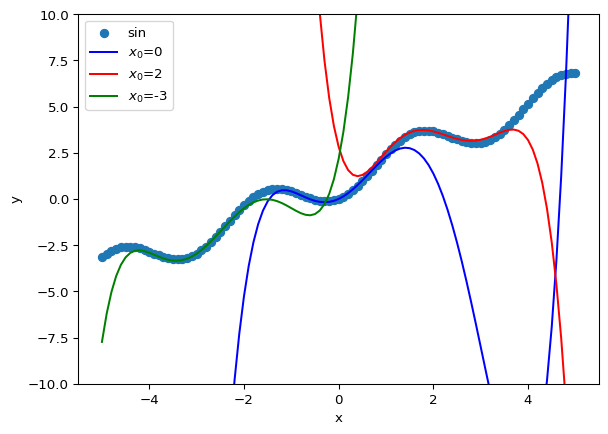

In [17]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-10, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, func(x_list), label='sin')

nmax = 5
h = 0.1

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), c='blue', label='$x_0$=0')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), c='red', label='$x_0$=2')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), c='green', label='$x_0$=-3')
plt.legend()
plt.show()

그런데 nmax를 10으로 늘리면 위의 함수보다는 조금 더 원래의 함수를
근사하는 형태를 띈다.

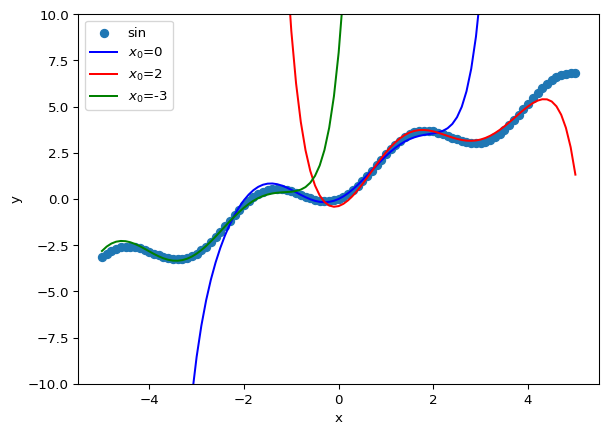

In [18]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-10, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, func(x_list), label='sin')

nmax = 10
h = 0.1

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), c='blue', label='$x_0$=0')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), c='red', label='$x_0$=2')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), c='green', label='$x_0$=-3')
plt.legend()
plt.show()

여기에서 도함수를 구하는 step을 조금더 적게 하면, 조금더 정확하게 원래
함수를 따라가는 형태를 띄게 된다.

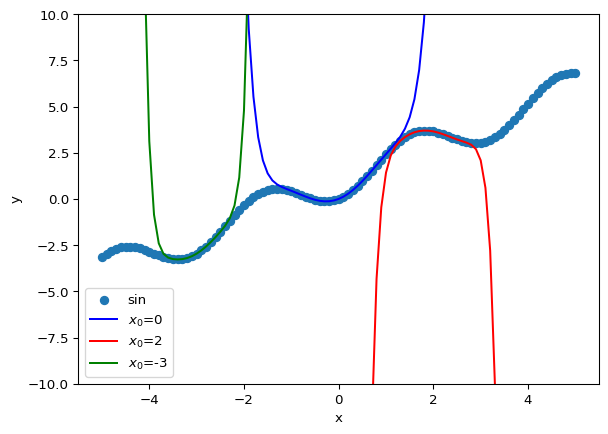

In [19]:
x_list = np.linspace(-5, 5, 101)
plt.ylim([-10, 10])

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_list, func(x_list), label='sin')

nmax = 10
h = 0.01

plt.plot(x_list, taylor(func, x_list, 0, nmax, h), c='blue', label='$x_0$=0')
plt.plot(x_list, taylor(func, x_list, 2, nmax, h), c='red', label='$x_0$=2')
plt.plot(x_list, taylor(func, x_list, -3, nmax, h), c='green', label='$x_0$=-3')
plt.legend()
plt.show()

결과적으로 어떤 함수를 계산하고자 하는데, 계산량이 많다 싶으면 그 함수의
도함수를 구할 수 있고, 또 함수에 대한 샘플이 많으면 많을수록 실제값과
유사하게 근사할 수 있다는 것을 나타내고 있다.